# Construindo um modelo de Regressão para marketing

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para **entender** melhor **a relação entre as variáveis** presentes nesses registros e **identificar os fatores que mais impactam** na geração de leads, a empresa solicitou a análise de um especialista em dados. **Além disso, a empresa busca criar um modelo de predição** de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

## Sobre os dados

A tabela contém informações dos investimentos feitos pelo youtube, facebook, newspaper e também a quantidade de cada.

| **Coluna**   | **Descrição**                                             |
|--------------|-----------------------------------------------------------|
| `youtube`    | Investimento em publicidade no YouTube (em unidades monetárias). |
| `facebook`   | Investimento em publicidade no Facebook (em unidades monetárias). |
| `newspaper`  | Investimento em publicidade em jornais (em unidades monetárias). |
| `sales`      | Valor das vendas gerado (em unidades monetárias).         |


### 0 - Setup

In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")
sns.set_context("notebook")

### 1 - Análise Descritiva

In [ ]:
path_name = "../Data"
csv_name = "MKT.csv"

file_path = os.path.join(path_name, csv_name)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print("Arquivo ou pasta não encontrada no diretório")

In [7]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
youtube,171.0,178.021053,102.449597,0.84,91.08,179.76,262.98,355.68
facebook,171.0,27.671579,17.913532,0.00,11.70,26.76,43.68,59.52
newspaper,171.0,35.240000,24.902918,0.36,13.74,31.08,50.88,121.08
sales,171.0,16.922807,6.314608,1.92,12.54,15.48,20.82,32.40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


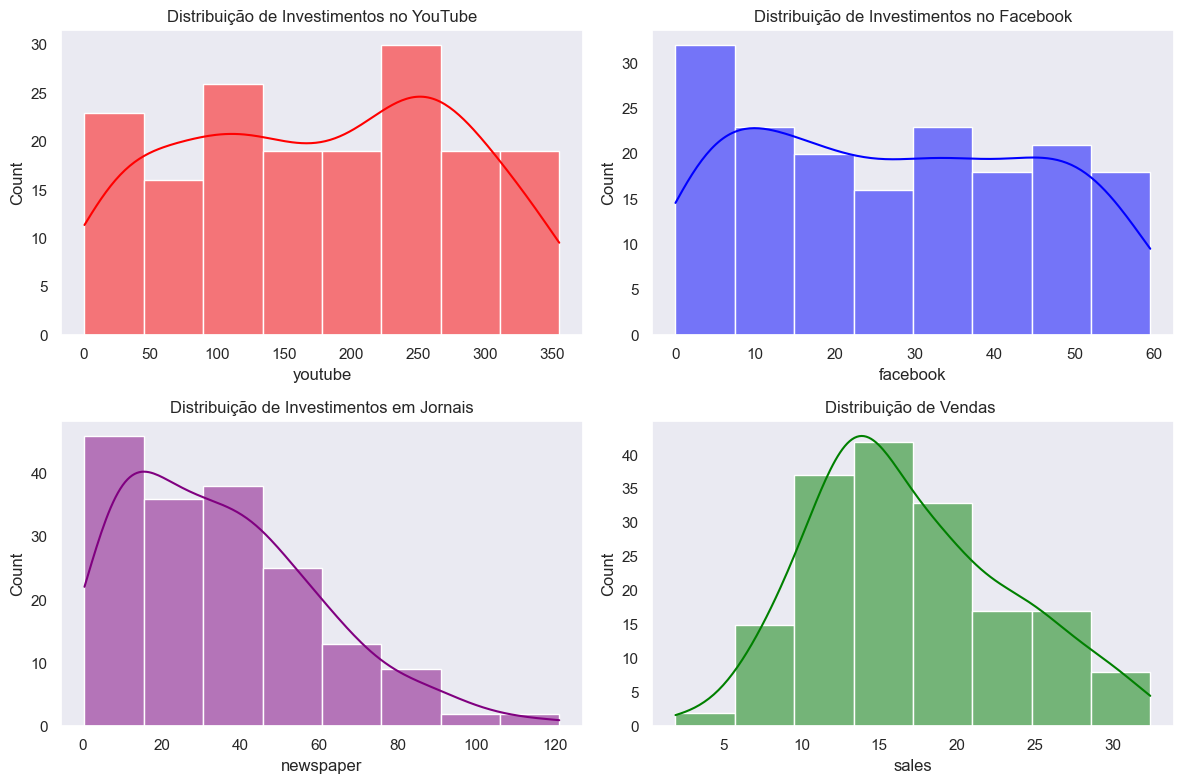

In [85]:
fig, axes = plt.subplots(2,2, figsize =(12,8))
sns.histplot(data=df, x='youtube', kde=True, bins=8, color='red', ax=axes[0,0])
axes[0,0].set_title("Distribuição de Investimentos no YouTube")

sns.histplot(data=df, x='facebook', kde=True, bins=8, color='blue', ax=axes[0,1])
axes[0,1].set_title("Distribuição de Investimentos no Facebook")

sns.histplot(data=df, x='newspaper', kde=True, bins=8, color='purple', ax=axes[1,0])
axes[1,0].set_title("Distribuição de Investimentos em Jornais")

sns.histplot(data=df, x='sales', kde=True, bins=8, color='green', ax=axes[1,1])
axes[1,1].set_title("Distribuição de Vendas ")

plt.tight_layout()
plt.show()


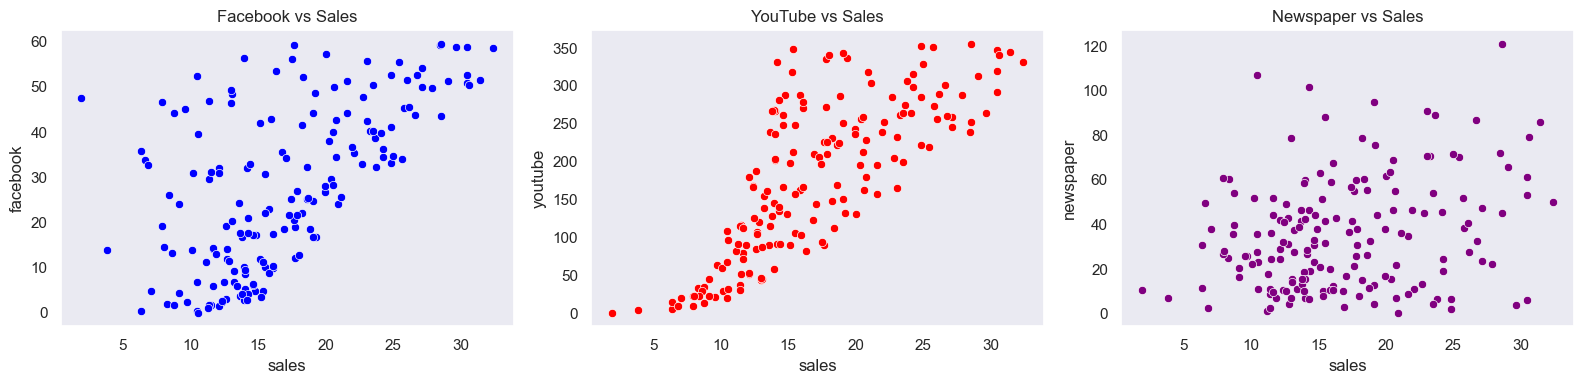

In [86]:
fig, axes = plt.subplots(1,3, figsize = (16,4))

sns.scatterplot(data =df, x = "sales", y = "facebook", color = "blue", ax = axes[0])\
   .set_title("Facebook vs Sales")

sns.scatterplot(data =df, x = "sales", y = "youtube", color = "red",ax = axes[1])\
   .set_title("YouTube vs Sales")

sns.scatterplot(data =df, x = "sales", y = "newspaper", color = "purple", ax = axes[2])\
   .set_title("Newspaper vs Sales")
plt.tight_layout()
plt.show()


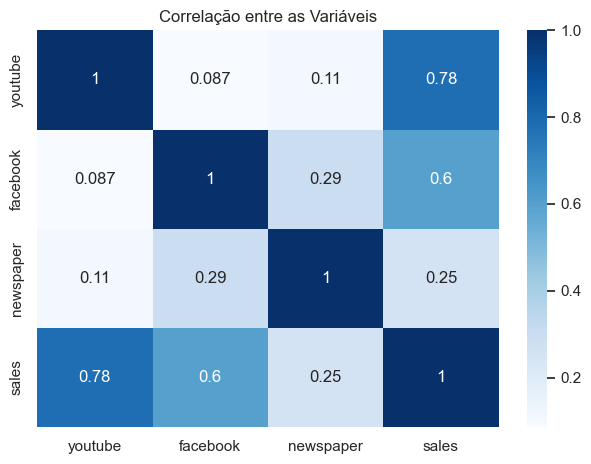

In [95]:
sns.heatmap(df.corr(), annot = True , cmap = "Blues")\
   .set_title("Correlação entre as Variáveis")
plt.tight_layout()
plt.show()

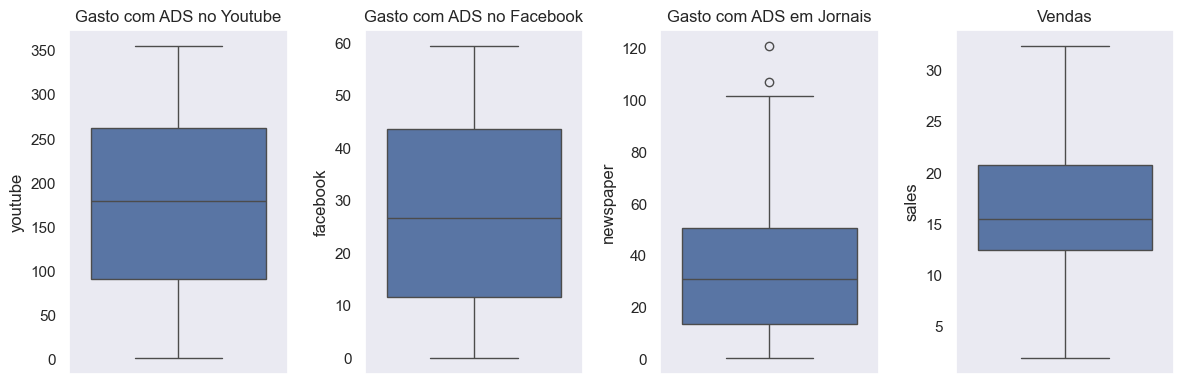

In [105]:
fig, axes = plt.subplots(1,4, figsize = (12,4))

sns.boxplot(df, y = "youtube", ax = axes[0]).set_title("Gasto com ADS no Youtube")
sns.boxplot(df, y = "facebook", ax = axes[1]).set_title("Gasto com ADS no Facebook")
sns.boxplot(df, y = "newspaper", ax = axes[2]).set_title("Gasto com ADS em Jornais")
sns.boxplot(df, y = "sales", ax = axes[3]).set_title("Vendas")
plt.tight_layout()
plt.show()